In [1]:
%run StatTest2_WithSimulation_Setup.ipynb

{0: ['ME', 'IL', 'PA', 'GA', 'OK', 'DE', 'WA', 'CT', 'OH', 'VA', 'NE', 'MT', 'IN', 'CA', 'HI', 'ND', 'MD', 'SC', 'RI', 'AK', 'KY', 'WI', 'LA', 'MN', 'MS', 'WV', 'FL'], 1: ['SD', 'IL', 'PA', 'NH', 'NM', 'NV', 'OK', 'UT', 'CT', 'OH', 'VA', 'OR', 'CO', 'IN', 'HI', 'AL', 'RI', 'AK', 'LA', 'MN', 'IA', 'AR', 'WV'], 2: ['MI', 'ME', 'WY', 'DC', 'TX', 'AZ', 'NC', 'WA', 'OR', 'CO', 'MT', 'ND', 'TN', 'SC', 'AL', 'NY', 'KY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 3: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'GA', 'AZ', 'NM', 'NC', 'NV', 'DE', 'UT', 'NE', 'CA', 'MD', 'TN', 'NY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO']}
{0: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'AZ', 'NM', 'NC', 'NV', 'UT', 'OR', 'CO', 'TN', 'AL', 'NY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 1: ['MI', 'ME', 'WY', 'DC', 'TX', 'GA', 'AZ', 'NC', 'DE', 'WA', 'NE', 'MT', 'CA', 'ND', 'MD', 'TN', 'SC', 'NY', 'KY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO'], 2: ['SD', 'IL', 'PA', 'NH', 'GA', 'NM', 'NV', 'OK', 'DE', 'UT', 'CT', 'OH', 'VA', 'NE', 'IN'

In [2]:
data2014 = pd.read_csv("Our_Dataset/2014dataset.csv")
data2015 = pd.read_csv("Our_Dataset/2015dataset.csv")
data2016 = pd.read_csv("Our_Dataset/2016dataset.csv")
data2017 = pd.read_csv("Our_Dataset/2017dataset.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,52,323,649,882,932,1092,1202) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,57,204,341,376,377,396,430,431,928,944,1006,1013,1151,1160,1169,1179,1411) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,17,163,355,406,702,835,847,1083,1156,1183,1185,1200) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Create the labels.
# By index:
# label 2 is transfers
# label 3 is premiums
# label 4 is costs
# label 5 is member months
# label 6 is reinsurance (individual group only)

ind_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                  "HHS RISK ADJUSTMENT TRANSFER AMOUNT (INDIVIDUAL MARKET, INCLUDING CATASTROPHIC)",
                  "1.1Directpremiumwritten2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "2.16Totalincurredclaims2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "STATE", "REINSURANCE PAYMENT AMOUNT (OR NOT ELIGIBLE)"] # no more reinsurance as of 2017
ind_labels_15 = [label.replace('15', '16') for label in ind_labels_14]
ind_labels_16 = [label.replace('15', '17') for label in ind_labels_14]
ind_labels_17 = [label.replace('15', '18') for label in ind_labels_14][:-1]

sg_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                 "HHS RISK ADJUSTMENT TRANSFERS AMOUNT (SMALL GROUP MARKET)",
                  "1.1Directpremiumwritten7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "2.16Totalincurredclaims7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "7.4Membermonths7HealthInsuranceSMALLGROUPTotalasof3/31/15", "STATE"]
sg_labels_15 = [label.replace('15', '16') for label in sg_labels_14]
sg_labels_16 = [label.replace('15', '17') for label in sg_labels_14]
sg_labels_17 = [label.replace('15', '18') for label in sg_labels_14]

In [4]:
# Filter the data to include only the fields we want

ind_data_14 = data2014[ind_labels_14].dropna()
ind_data_15 = data2015[ind_labels_15].dropna()
ind_data_16 = data2016[ind_labels_16].dropna()
ind_data_17 = data2017[ind_labels_17].dropna()
sg_data_14 = data2014[sg_labels_14].dropna()
sg_data_15 = data2015[sg_labels_15].dropna()
sg_data_16 = data2016[sg_labels_16].dropna()
sg_data_17 = data2017[sg_labels_17].dropna()

In [5]:
# Drop companies with <2000 MM
ind_data_14 = ind_data_14.where(ind_data_14[ind_labels_14[5]] > 2000).dropna()
ind_data_15 = ind_data_15.where(ind_data_15[ind_labels_15[5]] > 2000).dropna()
ind_data_16 = ind_data_16.where(ind_data_16[ind_labels_16[5]] > 2000).dropna()
ind_data_17 = ind_data_17.where(ind_data_17[ind_labels_17[5]] > 2000).dropna()
sg_data_14 = sg_data_14.where(sg_data_14[sg_labels_14[5]] > 2000).dropna()
sg_data_15 = sg_data_15.where(sg_data_15[sg_labels_15[5]] > 2000).dropna()
sg_data_16 = sg_data_16.where(sg_data_16[sg_labels_16[5]] > 2000).dropna()
sg_data_17 = sg_data_17.where(sg_data_17[sg_labels_17[5]] > 2000).dropna()

In [6]:
# Calculate transfers, premiums, costs, and reinsurance (if individual group) per member month
def calculate_pmm(df, df_labels, group):
    df["MM"] = df[df_labels[5]]
    df["Transfers"] = df[df_labels[2]]
    df["TotalCosts"] = abs(df[df_labels[4]])
    df["Enrollees"] = df["MM"] / 12
    df["TransfersPerEnrollee"] = df["Transfers"] / df["Enrollees"]
    df["TransfersPerSqrtEnrollee"] = df["Transfers"] / np.sqrt(df["Enrollees"])
    df["LogEnrollees"] = np.log(df["Enrollees"])
    df["LogTransfers"] = np.log(df["Transfers"]**2 + 1)
    df["TransfersPMM"] = df[df_labels[2]] / df[df_labels[5]]
    df["PremiumsPMM"] = abs(df[df_labels[3]] / df[df_labels[5]])
    df["CostsPMM"] = abs(df[df_labels[4]] / df[df_labels[5]])
    if group == "i":
        df["ReinsurancePMM"] = df[df_labels[7]] / df[df_labels[5]]
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"] + df["ReinsurancePMM"]
        #df["PremMinusCostsPlusReinsurancePMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["ReinsurancePMM"]
    elif group == "sg":
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["PremMinusCostsPMM"] = df["PremiumsPMM"] - df["CostsPMM"]
    df["PremMinusCostsPlusTransfersPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["SicknessPMM"] = df["CostsPMM"] - df["PremiumsPMM"]
    average_sickness = np.mean(df["SicknessPMM"])
    df["ExcessSicknessPMM"] = df["SicknessPMM"] - average_sickness
    return df

ind_data_14 = calculate_pmm(ind_data_14, ind_labels_14, "i")
ind_data_15 = calculate_pmm(ind_data_15, ind_labels_15, "i")
ind_data_16 = calculate_pmm(ind_data_16, ind_labels_16, "i")
ind_data_17 = calculate_pmm(ind_data_17, ind_labels_17, "sg")
sg_data_14 = calculate_pmm(sg_data_14, sg_labels_14, "sg")
sg_data_15 = calculate_pmm(sg_data_15, sg_labels_15, "sg")
sg_data_16 = calculate_pmm(sg_data_16, sg_labels_16, "sg")
sg_data_17 = calculate_pmm(sg_data_17, sg_labels_17, "sg")

In [7]:
# Combine the dataframes by left merging

ind_data = ind_data_14.merge(ind_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(ind_data_16, on='HIOS ID', how='outer').merge(ind_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [8]:
# Do the same thing for small group

sg_data = sg_data_14.merge(sg_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(sg_data_16, on='HIOS ID', how='outer').merge(sg_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [9]:
states = ["CA", "WI", "NY"]
dfs = [sg_data_14, sg_data_15, sg_data_16, sg_data_17]

In [10]:
dfs_new = normalize_empirical_data_to_avg_2017_dollars(dfs, states)

Cbar is 4398.953
CA 14 Ratio is 1.154
WI 14 Ratio is 1.127
NY 14 Ratio is 0.973
CA 15 Ratio is 1.117
WI 15 Ratio is 1.099
NY 15 Ratio is 0.896
CA 16 Ratio is 1.051
WI 16 Ratio is 1.053
NY 16 Ratio is 0.862
CA 17 Ratio is 1.015
WI 17 Ratio is 1.005
NY 17 Ratio is 0.782
Empirical Transfers Sum = 4001520027.257


In [11]:
for df_temp in dfs_new:
    df_temp["TransfersNormalizedPerSqrtEnrollee"] = df_temp["TransfersNormalized"] / np.sqrt(df_temp["Enrollees"])

In [12]:
#dfs_new[3][["TransfersPerSqrtEnrollee", "TransfersNormalizedPerSqrtEnrollee"]]

In [13]:
df2 = create_df2(states, dfs_new, "TransfersNormalizedPerSqrtEnrollee")


In [14]:
k = len(df2)
v = np.linspace(0, max(abs(df2)), 10000)
v = v[1:len(v)]

ratios = [ratio_list(df2, vi) for vi in v]
#print(ratios)
begin_p = 5/k
end_p = 1-begin_p
start_index = 0
end_index = 0
for index, ratio2 in enumerate(ratios):
    if ratio2 >= begin_p:
        start_index = index
        break
    
for index, ratio2 in enumerate(ratios):
    if ratio2 > end_p:
        end_index = index
        break

if end_index == 0:
    end_index = len(v) - 1
    
v = v[start_index:end_index]

ratios2 = ratios[start_index:end_index]
multiplier = [np.sqrt(2)/vi for vi in v]
#plt.plot(v, ratios2)
#plt.plot(v, multiplier)

In [15]:
y = [multiplier[i] * special.erfinv(ratio2) for i, ratio2 in enumerate(ratios2)]
#plt.plot(v, y)
#plt.title("1/beta vs. v")
beta = [1/yi for yi in y]
#plt.plot(v, beta)
#plt.axvline(x=64432.69, color='r', linestyle='--', label="Point of max difference")
#plt.title("beta vs. v")

In [16]:
# Finding the minimum beta
# Whenever we reject a beta, we reject all betas greater than that,
# so keep pushing beta smaller until we reach max_difference == test_statistic
# Run test for larger data sizes (combining states, years)

In [17]:
max_beta=max(beta)
max_beta = int(max_beta/100)*100

beta = 151700.000


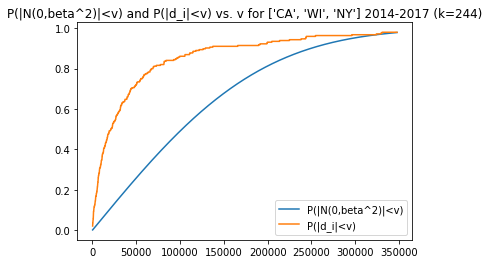

In [18]:
theoretical = [special.erf(vi/(max_beta*np.sqrt(2))) for vi in v]

plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v)")
plt.plot(v, ratios2, label="P(|d_i|<v)")
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (states, len(df2)))
#plt.axvline(x=64432.69, color='r', linestyle='--', label="Point of max difference")
plt.legend()
print("beta = %.3f" % (max_beta))

In [19]:
beta_theoretical, Mb_index = run_test_against_theoretical(df2, max_beta, ratios2, False)

k = 244
test_stat at this k = 0.07765

At the point of maximum difference with beta = 151700:
P(|d_i|<v) = 0.7008
P(|N(0,max_beta^2)|<v) = 0.2272
Difference = 0.4737




At the point of maximum difference with beta = 141700:
P(|d_i|<v) = 0.7008
P(|N(0,max_beta^2)|<v) = 0.2427
Difference = 0.4581




At the point of maximum difference with beta = 131700:
P(|d_i|<v) = 0.7008
P(|N(0,max_beta^2)|<v) = 0.2605
Difference = 0.4403




At the point of maximum difference with beta = 121700:
P(|d_i|<v) = 0.7008
P(|N(0,max_beta^2)|<v) = 0.2810
Difference = 0.4198




At the point of maximum difference with beta = 111700:
P(|d_i|<v) = 0.7008
P(|N(0,max_beta^2)|<v) = 0.3050
Difference = 0.3959




At the point of maximum difference with beta = 101700:
P(|d_i|<v) = 0.6311
P(|N(0,max_beta^2)|<v) = 0.2611
Difference = 0.3701




At the point of maximum difference with beta = 91700:
P(|d_i|<v) = 0.6311
P(|N(0,max_beta^2)|<v) = 0.2884
Difference = 0.3428




At the point of maximum difference with beta 

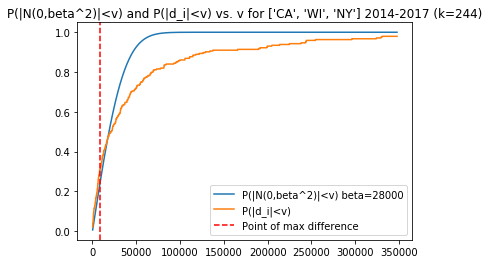

In [20]:
beta_theoretical = beta_theoretical+100

theoretical = [special.erf(vi/(beta_theoretical*np.sqrt(2))) for vi in v]

plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v) beta=%d" % (beta_theoretical))
plt.plot(v, ratios2, label="P(|d_i|<v)")
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (states, len(df2)))
plt.axvline(x=v[Mb_index], color='r', linestyle='--', label="Point of max difference")
plt.legend()
#plt.xlim(0, 50000)
#print("beta = %.3f" % (max_beta))

In [21]:
print("Theoretical Test Results")
run_binom_stat_test2(beta_theoretical, df2.values)

Theoretical Test Results
Beta (=std): 28000
Number of T/sqrt(n) above 2 stds: 61
Proportion of T/sqrt(n) above 2 stds: 0.250
P value = 0.000000


In [22]:
ratios_c, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical - 10000)
ratios_c2, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical)
ratios_c3, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical + 10000)

Sum sqrt(a) = 36274.381
Sum sqrt(a) = 36274.381
Sum sqrt(a) = 36274.381


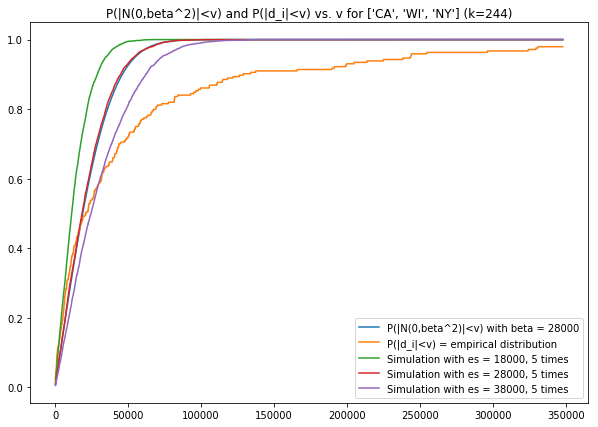

In [23]:
theoretical = [special.erf(vi/(beta_theoretical*np.sqrt(2))) for vi in v]

plt.figure(figsize=(10, 7))
plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v) with beta = %d" % (beta_theoretical))
plt.plot(v, ratios2, label="P(|d_i|<v) = empirical distribution")
plt.plot(v, ratios_c, label="Simulation with es = %d, 5 times" % (beta_theoretical - 10000))
plt.plot(v, ratios_c2, label="Simulation with es = %d, 5 times" % (beta_theoretical))
plt.plot(v, ratios_c3, label="Simulation with es = %d, 5 times" % (beta_theoretical + 10000))
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s (k=%d)" % (states, len(df2)))
plt.legend()

In [24]:
beta_sims = list()

for i in range(5):
    beta_sim, _= run_test_against_simulation(states, dfs_new, beta_theoretical, ratios2, False)
    beta_sims.append(beta_sim)

k = 244
test_stat at this k = 0.07765

At the point of maximum difference with beta = 32000:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1995
Difference = 0.1079




At the point of maximum difference with beta = 31900:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2131
Difference = 0.0943




At the point of maximum difference with beta = 31800:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2077
Difference = 0.0997




At the point of maximum difference with beta = 31700:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2153
Difference = 0.0921




At the point of maximum difference with beta = 31600:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2052
Difference = 0.1022




At the point of maximum difference with beta = 31500:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2016
Difference = 0.1057




At the point of maximum difference with beta = 31400:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2077
Difference = 0.0997




At the point of maximum difference with beta = 3130


At the point of maximum difference with beta = 30300:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2131
Difference = 0.0943




At the point of maximum difference with beta = 30200:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2169
Difference = 0.0904




At the point of maximum difference with beta = 30100:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2164
Difference = 0.0910




At the point of maximum difference with beta = 30000:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2191
Difference = 0.0883




At the point of maximum difference with beta = 29900:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2183
Difference = 0.0891




At the point of maximum difference with beta = 29800:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2169
Difference = 0.0904




At the point of maximum difference with beta = 29700:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2303
Difference = 0.0770 NOT > test_stat
k = 244
test_stat at this k = 0.07765

At the point of maximum difference wit

In [25]:
print("Simulation without Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sims), df2.values)
run_binom_stat_test3(np.mean(beta_sims), df2.values)

Simulation without Adjustment Test Results
Beta (=std): 29800
Number of T/sqrt(n) above 2 stds: 56
Proportion of T/sqrt(n) above 2 stds: 0.230
P value = 0.000000
Beta (=std): 29800
Number of T/sqrt(n) above 3 stds: 39
Proportion of T/sqrt(n) above 3 stds: 0.160
P value = 0.000000


In [26]:
beta_sim_adjs = list()

for i in range(5):
    beta_sim_adj, _= run_test_against_simulation_adjust_for_imbalances(states, dfs_new,
                                                                   beta_theoretical, ratios2, False)
    beta_sim_adjs.append(beta_sim_adj)

k = 244
test_stat at this k = 0.07765
Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 32000:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2158
Difference = 0.0915



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 31900:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2077
Difference = 0.0997



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 31800:
P(|d_i|<v) = 0.2705
P(|N(0,max_beta^2)|<v) = 0.1869
Difference = 0.0836



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 31700:
P(|d_i|<v) = 0.2664
P(|N(0,max_beta^2)|<v) = 0.1754
Difference = 0.0910



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 31600:
P(|d_i|<v) = 0.2787
P(|N(0,max_beta^2)|<v) = 0.1822
Difference = 0.0964



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 31500:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2139
Difference = 0.0934



Sum sqrt(a) = 36274.381

At the point 

Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 31000:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2128
Difference = 0.0945



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 30900:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2257
Difference = 0.0817



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 30800:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2112
Difference = 0.0962



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 30700:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2227
Difference = 0.0847



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 30600:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2202
Difference = 0.0872



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 30500:
P(|d_i|<v) = 0.2582
P(|N(0,max_beta^2)|<v) = 0.1735
Difference = 0.0847



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 3040

In [27]:
print("Simulation WITH Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sim_adjs), df2.values)
run_binom_stat_test3(np.mean(beta_sim_adjs), df2.values)

Simulation WITH Adjustment Test Results
Beta (=std): 30520
Number of T/sqrt(n) above 2 stds: 55
Proportion of T/sqrt(n) above 2 stds: 0.225
P value = 0.000000
Beta (=std): 30520
Number of T/sqrt(n) above 3 stds: 39
Proportion of T/sqrt(n) above 3 stds: 0.160
P value = 0.000000


In [28]:
print("Theoretical Test Results")
run_binom_stat_test2(beta_theoretical, df2.values)
run_binom_stat_test3(beta_theoretical, df2.values)
print("\n")
print("Simulation without Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sims), df2.values)
run_binom_stat_test3(np.mean(beta_sims), df2.values)
print("\n")
print("Simulation WITH Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sim_adjs), df2.values)
run_binom_stat_test3(np.mean(beta_sim_adjs), df2.values)

Theoretical Test Results
Beta (=std): 28000
Number of T/sqrt(n) above 2 stds: 61
Proportion of T/sqrt(n) above 2 stds: 0.250
P value = 0.000000
Beta (=std): 28000
Number of T/sqrt(n) above 3 stds: 39
Proportion of T/sqrt(n) above 3 stds: 0.160
P value = 0.000000


Simulation without Adjustment Test Results
Beta (=std): 29800
Number of T/sqrt(n) above 2 stds: 56
Proportion of T/sqrt(n) above 2 stds: 0.230
P value = 0.000000
Beta (=std): 29800
Number of T/sqrt(n) above 3 stds: 39
Proportion of T/sqrt(n) above 3 stds: 0.160
P value = 0.000000


Simulation WITH Adjustment Test Results
Beta (=std): 30520
Number of T/sqrt(n) above 2 stds: 55
Proportion of T/sqrt(n) above 2 stds: 0.225
P value = 0.000000
Beta (=std): 30520
Number of T/sqrt(n) above 3 stds: 39
Proportion of T/sqrt(n) above 3 stds: 0.160
P value = 0.000000
